In [114]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper

%matplotlib inline
importlib.reload(DataLoader)
coverage_df = DataLoader.load_csv_coverage()


Number of apps: 
251


Total covered methods:
1732188


Everything is good!


In [115]:
coverage_df.head()

,package,class,method,strategy,coverage_type,coverage_percentage,covered_lines,total_lines,app
0,com.pnsdigital.appconfig,com.pnsdigital.appconfig.BuildConfig,BuildConfig (): void,systematic,method,0,0,1,com.pnsdigital.weather.ksat
1,com.pnsdigital.appconfig,com.pnsdigital.appconfig.BuildConfig,BuildConfig (): void,systematic,block,0,0,3,com.pnsdigital.weather.ksat
2,com.pnsdigital.appconfig,com.pnsdigital.appconfig.R,R (): void,systematic,method,0,0,1,com.pnsdigital.weather.ksat
3,com.pnsdigital.appconfig,com.pnsdigital.appconfig.R,R (): void,systematic,block,0,0,3,com.pnsdigital.weather.ksat
4,com.pnsdigital.appconfig,com.pnsdigital.appconfig.R$anim,R$anim (): void,systematic,method,0,0,1,com.pnsdigital.weather.ksat


In [118]:
systematic_method_coverage = CoverageHelper.filter("method", "systematic", coverage_df)
systematic_coverage_per_app = systematic_method_coverage.groupby(["app"])['coverage_percentage'].apply(
    lambda x: x.sum() / x.count()).sort_values(ascending=False)
systematic_coverage_per_app.head()
# systematic_coverage_per_app.plot.box()


app
com.junjundroid.gordyn                              91.304348
com.snaptattooadder                                 81.538462
com.watchtv.freetv                                  78.947368
com.nglish.spanish.english.translator               75.342466
com.monotype.android.font.handwritefontstylefree    66.666667
Name: coverage_percentage, dtype: float64

In [113]:
random_method_coverage = CoverageHelper.filter("method", "random", coverage_df)
random_coverage_per_app = random_method_coverage.groupby(["app"])['coverage_percentage'].apply(
    lambda x: x.sum() / x.count()).sort_values(ascending=False)
random_coverage_per_app.head()
# random_coverage_per_app.plot.box()

app
com.snaptattooadder               95.384615
com.watchtv.freetv                94.736842
com.junjundroid.gordyn            91.304348
uk.co.resortmarketing.curryguy    64.627660
ru.alexko.regionalcodes           64.285714
Name: coverage_percentage, dtype: float64

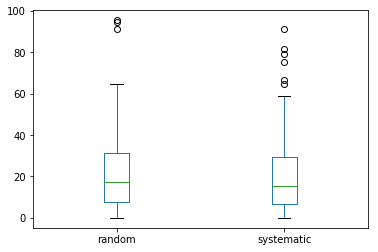

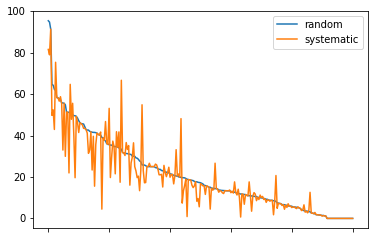

In [71]:
random_and_systematic_coverage = pd.concat(
    [random_coverage_per_app.rename('random'), systematic_coverage_per_app.rename('systematic')], axis=1,
    sort=False)
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random != 0) & (random_and_systematic_coverage.systematic != 0)]
random_and_systematic_coverage.plot.box()
random_and_systematic_coverage.plot()

In [70]:
random_and_systematic_coverage.describe()

,random,systematic
count,229.000000,229.000000
mean,23.468771,21.918856
std,17.748357,17.400437
min,1.132075,0.663850
25%,10.571429,8.951407
50%,18.934911,16.666667
75%,34.355828,31.818182
max,95.384615,91.304348


In [121]:
random_block_coverage_per_app = random_coverage_per_app = \
    CoverageHelper.filter("block", "random", coverage_df).groupby(["app"])[
        ['covered_lines', 'total_lines']].apply(
        lambda x: x.sum())
random_block_coverage_per_app['percentage_covered'] = (random_block_coverage_per_app.covered_lines / random_block_coverage_per_app.total_lines) * 100
random_block_coverage_per_app.head()
random_block_coverage_per_app.describe()


,covered_lines,total_lines,percentage_covered
count,251.000000,251.000000,251.000000
mean,4189.195219,41804.107570,19.210695
std,7314.829627,76344.776075,17.602664
min,0.000000,18.000000,0.000000
25%,344.500000,2113.500000,5.910050
50%,1498.000000,10558.000000,13.944530
75%,4489.000000,35266.500000,28.129535
max,41327.000000,498797.000000,91.884380


In [122]:
systematic_block_coverage_per_app = systematic_coverage_per_app = CoverageHelper.filter("block", "systematic", coverage_df).groupby(["app"])[
    ['covered_lines', 'total_lines']].apply(
    lambda x: x.sum())
systematic_block_coverage_per_app['percentage_covered'] = (systematic_block_coverage_per_app.covered_lines / systematic_block_coverage_per_app.total_lines) * 100
systematic_block_coverage_per_app.head()
systematic_block_coverage_per_app.describe()


,covered_lines,total_lines,percentage_covered
count,251.000000,251.000000,251.000000
mean,3768.904382,41804.107570,18.121262
std,6750.191358,76344.776075,17.686378
min,0.000000,18.000000,0.000000
25%,326.500000,2113.500000,5.236090
50%,1305.000000,10558.000000,12.790873
75%,3853.000000,35266.500000,26.755915
max,39036.000000,498797.000000,91.428571


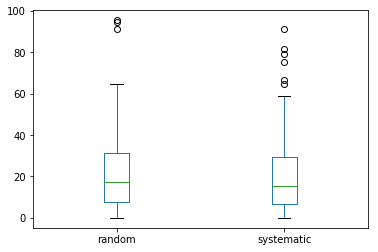

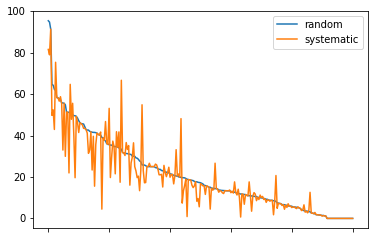

In [123]:
random_and_systematic_block_coverage = pd.concat(
    [random_block_coverage_per_app.percentage_covered.rename('random'), systematic_block_coverage_per_app.percentage_covered.rename('systematic')], axis=1,
    sort=False)
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random != 0) & (random_and_systematic_coverage.systematic != 0)]
random_and_systematic_coverage.plot.box()
random_and_systematic_coverage.plot()